<html>
  <h1  align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Trabajo Práctico Entregable
  </h1>
  <h2 align="center";>
    Laboratorio 1
  </h2>
</html>


## Profesora del Práctico:
- Fonseca, Rocio

## Integrantes [ Grupo 5 ]:
- Argüello, Leandro Ismael
- Corral, Diego
- Racciatti. Florencia 
- Rinaudo, Eleana
- Romero, Ernest

<html>
<hr>
  <h1  align="center";>
    Introducción al Aprendizaje Automático
  </h1>
<hr>
</html>

# Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "**Boston house prices dataset**".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

## Carga del Conjunto de Datos

Cargamos el conjunto de datos de la libreria housing desde scikit-learn  =y entenderla.

In [ ]:
boston = load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print("\n Descripción del dataset\n", boston["DESCR"])
print("\n Matriz con los datos de entrada(atributos)\n", boston["data"])
print("\n Vector de valores a predecir\n", boston["target"])
print(
    "\n Nombres de los atributos para cada columna de 'data'\n", boston["feature_names"]
)





 Descripción del dataset
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $1

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

####  1. ¿De qué se trata el conjunto de datos?

Este conjunto de datos contiene los de precios de las viviendas de Boston 
donde tiene problema ético. 

El conjunto tienen información sobre la tasa de criminalidad per cápita por ciudad, número del promedio de habitaciones por vivienda, accesibilidad a las autopistas por radio, entre otras.


#### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?



La variable que vamos a utilizar es `MEDV` que contiene el valor promedio de las viviendas ocupadas por sus propietarios en miles de dólares.

El resto son las variables características a partir de las cuales pronosticaremos el valor de una vivienda.

#### 3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

- `CRIM`: Tasa de criminalidad per cápita por ciudad
- `ZN`: Proporción de suelo residencial para lotes de más de 25.000 pies cuadrados
- `INDUS`: Proporción de industrias comerciales no minoristas por ciudad
- `CHAS`: Variable ficticia que indica si la vivienda esta cerca del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
- `NOX`: Concentración de monóxido de nitrógeno (partes por 10 millones)
- `RM`: Número promedio de habitaciones por vivienda
- `AGE`: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- `DIS`: Distancias ponderadas a cinco centros de empleo de Boston
- `RAD`: Índice de accesibilidad a las autopistas radiales
- `TAX`: Tasa de impuesto sobre la propiedad de valor total por 10000 dólares
- `PTRATIO`: Proporción de alumnos por maestro por ciudad
- `B`: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad
- `LSTAT`: Porcentaje de población de menor estatus
- `MEDV`: Valor promedio de las viviendas ocupadas por sus propietarios en 1000 dólares


#### 4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Los atributos más determinantes que nosotros consideramos son:

- `CRIM`: Tasa de criminalidad
- `INDUS`: Cantidad de industrias comerciales no minoristas 
- `NOX`: Concentración de monóxido de nitrógeno
- `RM`: Número de habitaciones
- `AGE`: Antigüedad de la vivienda
- `LSTAT`: Población de menos status social.


#### 5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.




Los posibles sesgos que consideramos es el de `AGE` porque podríamos concurrir a un error ya que se podríamos pensar que una mayor proporción de viviendas ocupadas y construidas antes de 1940 nos haga prejuzgar que sea una zona antigua y menos costosa pero podría tratarse de viviendas antiguas de alta categoría o de gran tamaño.

El atributo de `CRIM` podría generar un sesgo ya que el porcentaje de criminalidad depende de la proporción de la población. Una zona de más proporción de población habitualmente tiene mayor criminalidad pero no siempre es más económica.

Además, consideramos un dilema ético al atributo de `B` que sería la proporción de población afroamericana ya que hay un sesgo racial.


### Análisis de los datos

Creamos una nueva Dataframe para poder analizar los conjunto de datos. 

In [ ]:
boston_data = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Los valores `target` faltan en los datos. 
Creamos una nueva columna de valores `target` como `MEDV` y agregamos al nuevo DataFrame

In [ ]:
boston_data['MEDV'] = boston.target


###Preprocesamiento de Datos 

Después de cargar los datos, es una buena práctica ver si faltan valores en los datos. 

Contamos el número de valores faltantes para cada característica usando `isnull()`

In [ ]:
boston_data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Observamos que no hay valores faltantes en este conjunto de datos.

Tracemos la distribución de la variable objetivo `MEDV`.

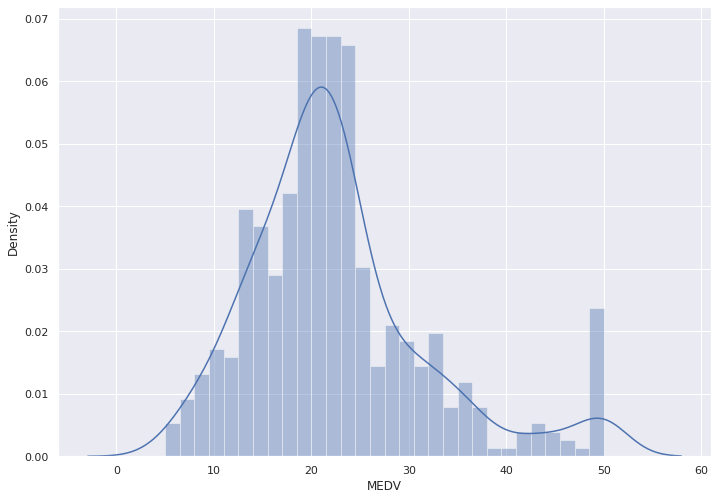

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data["MEDV"], bins=30)
plt.show()


Vemos que los valores de nuestro target `MEDV` se distribuyen normalmente con pocos valores atípicos. 

----
## Ejercicio 2: Visualización de los Datos


Preparamos los datos para el entrenamiento del modelo.

A continuación, dividimos los datos en conjuntos de entrenamiento y prueba. 

Entrenamos el modelo con el 80% de las muestras y probamos con el 20% restante. Hacemos esto para evaluar el rendimiento del modelo en datos no vistos. 

Para dividir los datos, usaremos la función `train_test_split` proporcionada por la biblioteca `scikit-learn`. 

Finalmente imprimimos los tamaños de nuestro conjunto de entrenamiento y prueba para verificar si la división se ha producido correctamente.

In [ ]:
X = boston["data"]
Y = boston["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, random_state=0
)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## División en Entrenamiento y Evaluación


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("- Datos de Entrenamiento: ", X_train.shape)
print("- Datos de Test: ", X_test.shape)
print("- Tamaño de Entrenamiento:", y_train.shape)
print("- Tamaño de Test:", y_test.shape)


- Datos de Entrenamiento:  (404, 13)
- Datos de Test:  (102, 13)
- Tamaño de Entrenamiento: (404,)
- Tamaño de Test: (102,)


### 1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

-  Variable `CRIM`

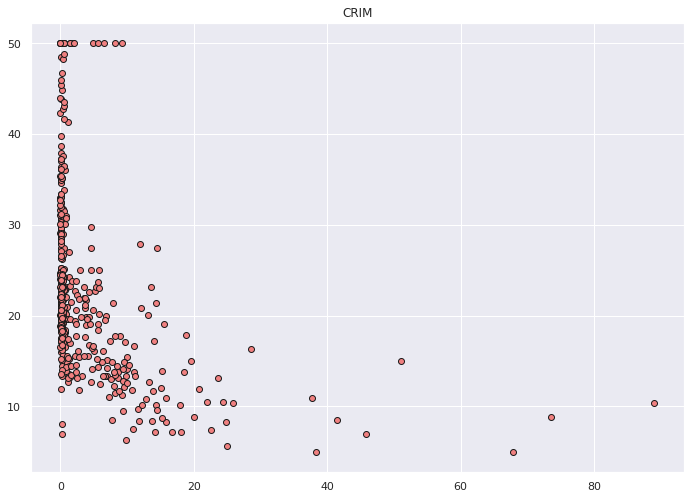

In [ ]:
feature = "CRIM"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], y = Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


- Variable `ZN`


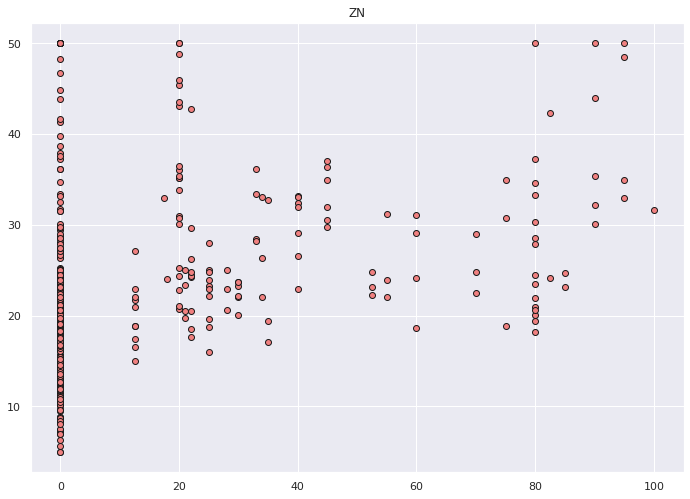

In [ ]:
feature = "ZN"

selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `INDUS`


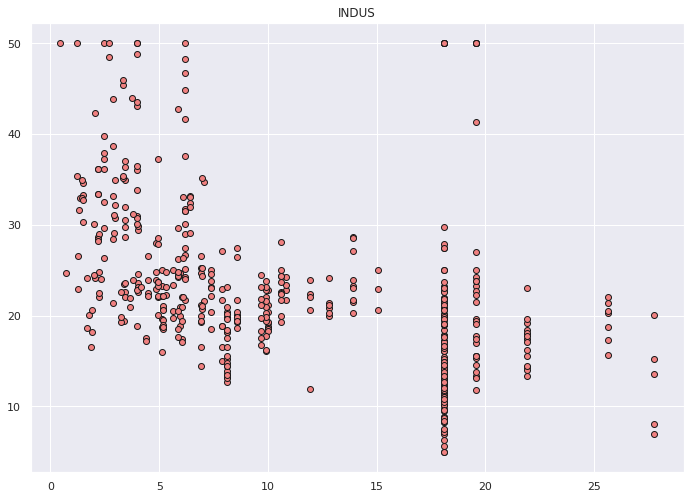

In [ ]:
feature = "INDUS"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `CHAS`

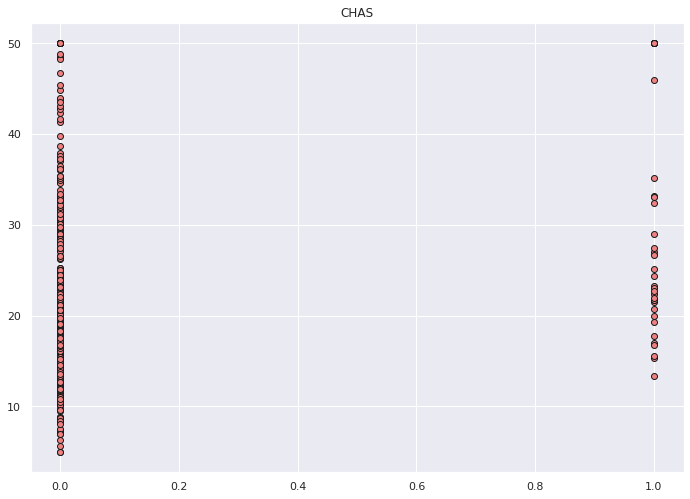

In [ ]:
feature = "CHAS"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `NOX`


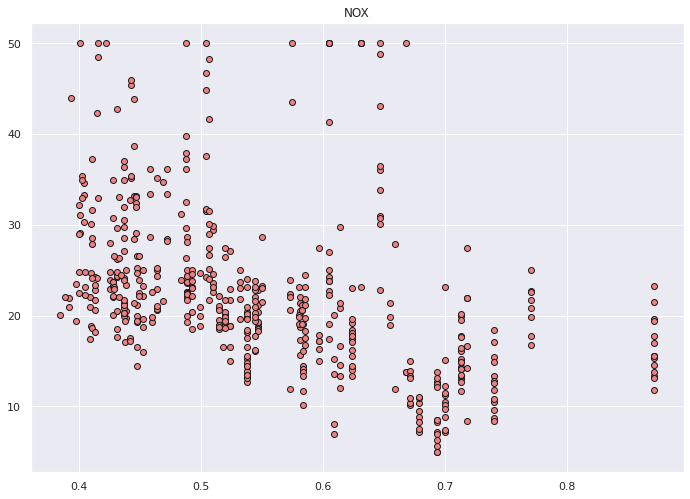

In [ ]:
feature = "NOX"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `RM`


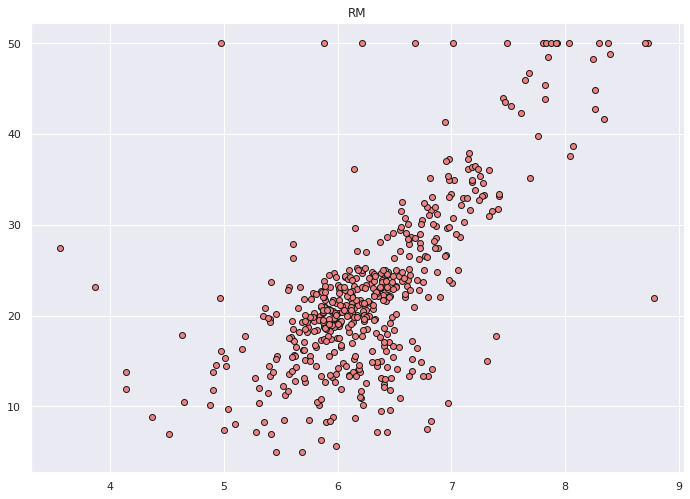

In [ ]:
feature = "RM"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


- Variable `AGE`


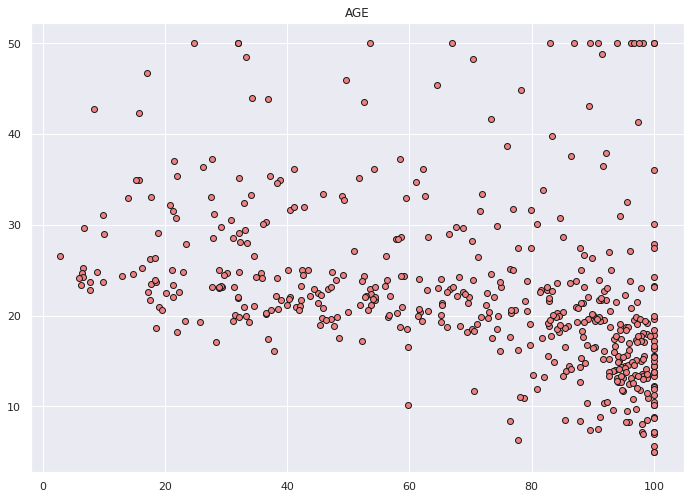

In [ ]:
feature = "AGE"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `DIS`


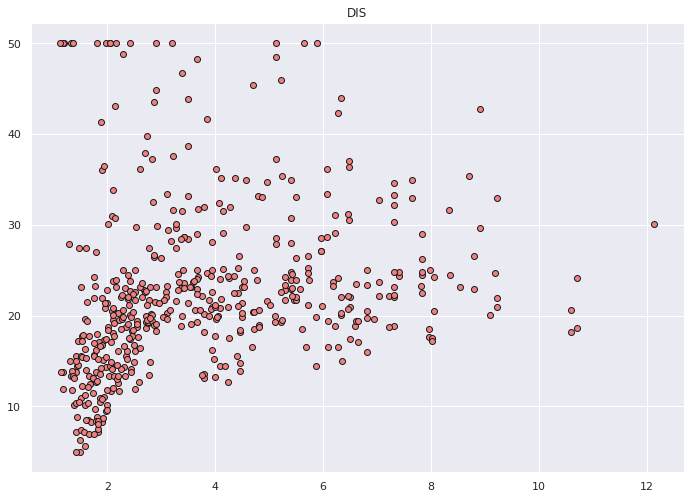

In [ ]:
feature = "DIS"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `RAD`


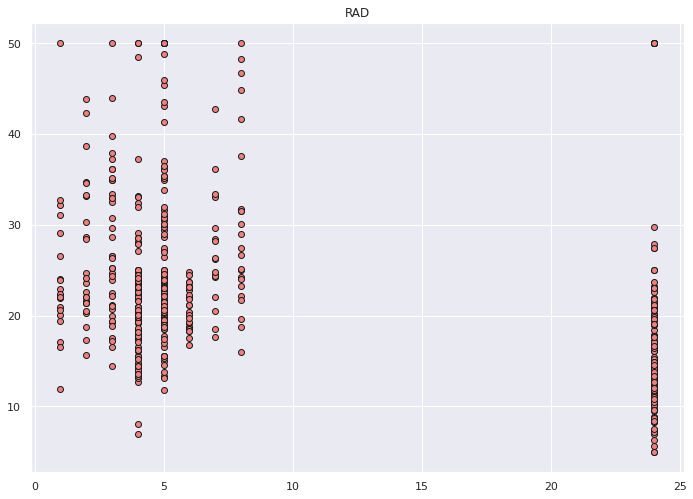

In [ ]:
feature = "RAD"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `TAX`


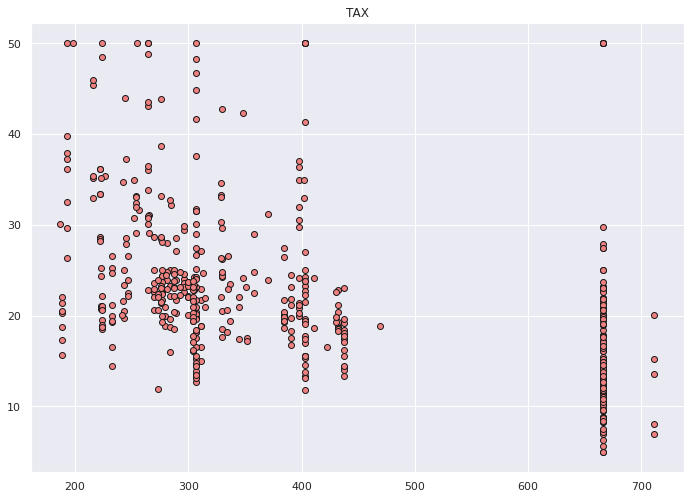

In [ ]:
feature = "TAX"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



- Variable `PTRATIO`


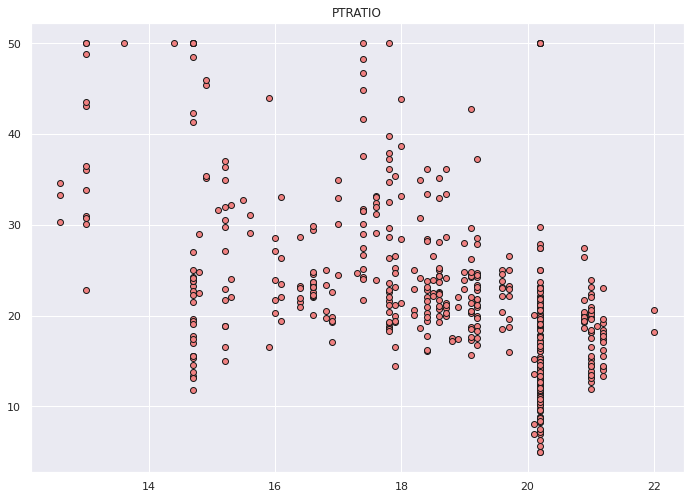

In [ ]:
feature = "PTRATIO"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()


- Variable `B`


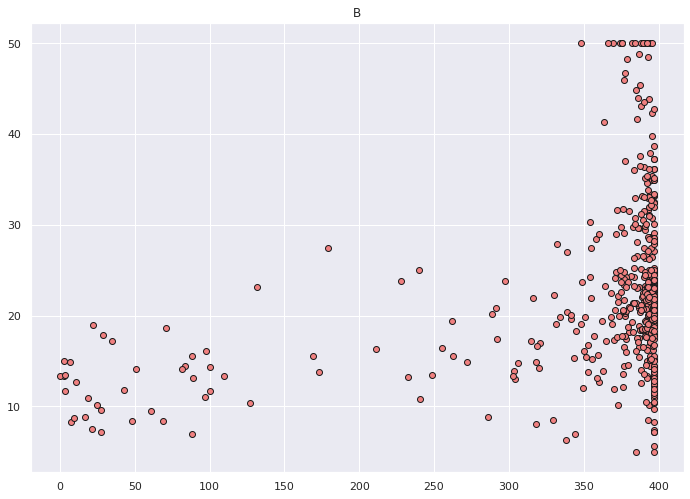

In [ ]:
feature = "B"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()




- Variable `LSTAT`


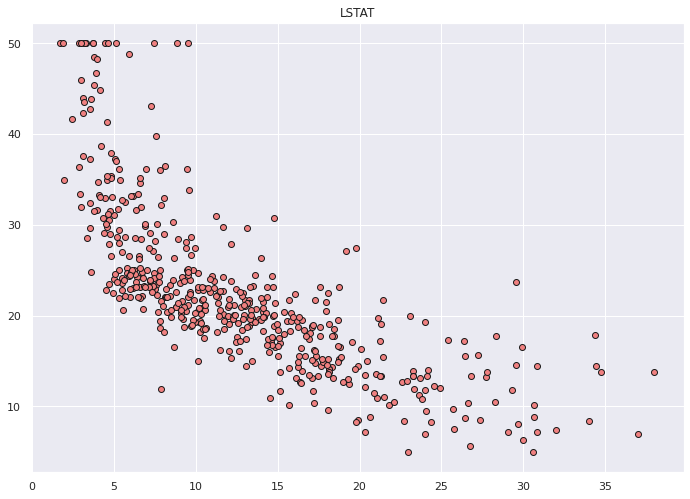

In [ ]:
feature = "LSTAT"
selector = boston["feature_names"] == feature
plt.scatter(X[:, selector], Y, facecolor="lightcoral", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



#### 2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.



- `CRIM`: 
  - Cuando nos acercamos a zonas con menor tasa de criminalidad se observa un incremento del valor promedio de las viviendas ocupadas.
  - La mayor concentración se encuentra en zonas con bajas tasas de criminalidad.
  - Los lugares donde la criminalidad es baja los precios de las viviendas también son bajos.
- `ZN`:
  - Hay mayor concentración cuando hay menor superficie pero hay mucha variación de precios en relación al valor promedio de vivienda.
- `INDUS`:
  - La mayor concentración de  valor promedio de viviendas se encuentran en zonas menos industrializadas.
- `CHAS`:
  - La mayor concentración de viviendas se encuentran en zonas más alejadas del río Charles.
  - Las viviendas que se encuentran en zonas cercanas al río Charles, su costo es superior a 10000 dólares.
 
- `NOX`:
  - La mayor concentración de viviendas se encuentran en zonas con menos concentración de monóxido de nitrógeno.
  - La tendencia de valor promedio de la vivienda aumenta a medida que disminuye la concentración de monóxido de nitrógeno.
- `RM`:
  - Observamos que la mayor cantidad de viviendas se concentra entre aquellas que poseen de 5 a 7 habitaciones.
  - Hay una relación directa entre el número de habitaciones y el valor promedio de la vivienda.
- `AGE`:
  - Observamos que la tendencia es un menor costo de viviendas para aquellas con mayor antigüedad.
  - Hay una mayor cantidad de viviendas antiguas en la zona analizada.
- `DIS`:
  - Se observa que a medida que nos acercamos a los centros de empleos de Boston, el costo de la vivienda disminuye.
- `RAD`:
  - No se observa una tendencia determinada. Debido a que la distribución de los datos es muy variada.
- `TAX`:
  - Hay una mayor concentración de viviendas en zonas con bajos costos de impuestos.
- `PRATIO`:
  - No se encuentra un patrón de relación que podría brindar información relacionada al costo de las viviendas.
- `B`:
  - Se observa una mayor conglomeración de viviendas en zonas con mayor proporción de personas afroamericanas.
  - En dichas zonas se encuentran las viviendas más costosas.
- `LSTAT`:
  - Se observa que en las zonas con mayor porcentaje de personas de bajos recursos el costo de las viviendas es menor.

### 3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Usamos correlaciones para observar los atributos del modelo obtenido con `MEDV` realizada con el dataset realizado al principio

In [ ]:
corr = boston_data.corr()
corr = corr[["MEDV"]]
corr.loc[:, "abs_corr"] = np.abs(corr["MEDV"])
corr.sort_values(by="abs_corr", ascending=False)


,MEDV,abs_corr
MEDV,1.000000,1.000000
LSTAT,-0.737663,0.737663
RM,0.695360,0.695360
PTRATIO,-0.507787,0.507787
INDUS,-0.483725,0.483725
TAX,-0.468536,0.468536
NOX,-0.427321,0.427321
CRIM,-0.388305,0.388305
RAD,-0.381626,0.381626
AGE,-0.376955,0.376955




A continuación, creamos una **matriz de correlación** que mide las relaciones lineales entre las variables. 

La matriz de correlación se puede formar utilizando la función `corr` de la biblioteca de pandas. 


Usaremos la función de **mapa de calor** para trazar la **matriz de correlación**.

In [ ]:
correlation_matrix = boston_data.corr().round(2)
fig = px.imshow(correlation_matrix, 
                color_continuous_scale='Viridis',
                text_auto=True, 
                aspect="auto")
fig.show()


Un punto importante en la selección de características para un modelo de regresión lineal es comprobar la **multicolinealidad**.

Las características `RAD`, `TAX` tienen una **correlación** de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No debemos seleccionar ambas características juntas para entrenar el modelo.

Lo mismo ocurre con las funciones `DIS` y `AGE`, que tienen una correlación de -0,75.

>**Observación:**
>
>- Para ajustar un modelo de Regresión Lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo `MEDV`. 
>
>- Al observar la matriz de correlación, podemos ver que `RM` tiene una **fuerte correlación positiva** con `MEDV` (0,7), mientras que `LSTAT` tiene una **alta correlación negativa** con `MEDV` (-0,74).

----

## Ejercicio 3: Regresión Lineal


**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.


#### 1. Seleccione **un solo atributo** que considere puede ser el más apropiado.

Seleccionamos el atributo `RM`

In [ ]:
feature = "RM"
selector = boston["feature_names"] == feature
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
print("Entrenamiento de RM: ",X_train_f.shape)
print("Test de RM", X_test_f.shape)

Entrenamiento de RM:  (404, 1)
Test de RM (102, 1)


#### 2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.

Usamos `LinearRegression` de `scikit-learn` para entrenar nuestro modelo en los conjuntos de entrenamiento y prueba.

In [ ]:
reg_l = LinearRegression()
reg_l.fit(X_train_f, y_train)

(reg_l.coef_, reg_l.intercept_)



(array([9.37638431]), -36.476189627647315)

### 3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.

In [ ]:
y_pred = reg_l.predict(X_test_f)
print(f"Train error: {reg_l.score(X_train_f, y_train):f}")
print(f"Test error: {reg_l.score(X_test_f, y_test):f}")

print("El error cuadrático es:", mean_squared_error(X_test_f, y_test))


Train error: 0.497080
Test error: 0.423944
El error cuadrático es: 329.37039834313725


### 4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.

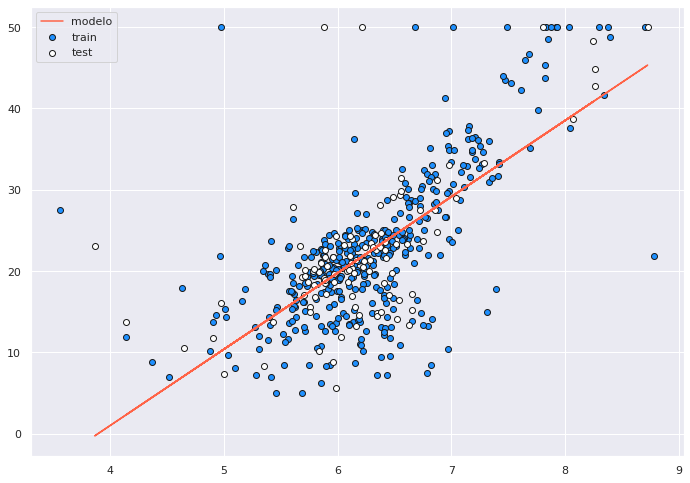

In [ ]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X_test_f, y_pred, color="tomato", label="modelo")

plt.legend()
plt.show()

#### 5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

Usando el atributo `RM` notamos que:

- El gráfico de Regresión Lineal muestra que a medida que aumenta el número de habitaciones, aumenta el valor promedio de las viviendas.

- El valor del error del entrenamiento es mayor al valor del error de testeo. Como la diferencia es mínima, no hay evidencia de overfitting.

----
## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.



**Observación:** 

Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### 1. Para varios grados de polinomio, haga lo siguiente:
  1. Instancie y entrene una regresión polinomial.
  2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
  3. Guarde los errores en una lista.

#### 1. Instancie y entrene una regresión polinomial.

In [ ]:
train_errors = list()
test_errors = list()
degrees = np.arange(1, 9)
for degree in degrees:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)

    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    print(
        f"Grado {degree} \tTrain error {train_error.round(2)} \tTest error {test_error.round(2)}"
    )


Grado 1 	Train error 42.82 	Test error 46.91
Grado 2 	Train error 37.75 	Test error 39.79
Grado 3 	Train error 36.4 	Test error 39.83
Grado 4 	Train error 34.81 	Test error 41.55
Grado 5 	Train error 33.13 	Test error 41.04
Grado 6 	Train error 33.13 	Test error 41.01
Grado 7 	Train error 33.06 	Test error 42.39
Grado 8 	Train error 33.06 	Test error 42.4


#### 2. Grafique las curvas de error en términos del grado del polinomio.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=degrees, y=train_errors,
                    mode='lines',
                    name='train_errors'))
fig.add_trace(go.Scatter(x=degrees, y=test_errors,
                    mode='lines+markers',
                    name='test_errors'))
fig.update_layout(xaxis_title='degree',
                   yaxis_title='Error')



#### 3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

Observando el gráfico, hay mejor sobreajuste cuando el polinomio es de grado 2.




#### 4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

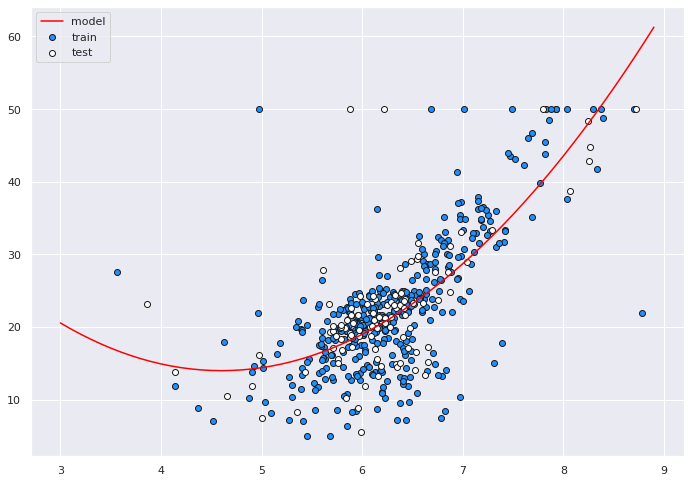

In [ ]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")


plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()


In [ ]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"- Train Error: {train_error}")
print(f"- Test Error: {test_error}")


- Train Error: 37.74552897028126
- Test Error: 39.79473116372652


#### 5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.


-  El gráfico con el polinomio de grado 2 se adapta mejor al comportamiento en comparación con el de Regresión Lineal.
- Además, se reduce los errores de entrenamiento y el de test a comparación del Regresión Lineal.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.





#### 1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

In [ ]:
selector = (
    (boston["feature_names"] == "LSTAT")
    | (boston["feature_names"] == "RM")
    | (boston["feature_names"] == "PTRATIO")
)
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape


((404, 3), (102, 3))

#### 2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

In [ ]:
train_errors = list()
test_errors = list()
degrees = np.arange(1, 9)
for degree in degrees:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)

    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(
        f"Grado {degree} \tTrain error {train_error.round(3)} \tTest error {test_error.round(3)}"
    )


Grado 1 	Train error 23.682 	Test error 41.678
Grado 2 	Train error 14.171 	Test error 30.008
Grado 3 	Train error 12.53 	Test error 30.978
Grado 4 	Train error 9.51 	Test error 37.901
Grado 5 	Train error 8.2 	Test error 32.222
Grado 6 	Train error 7.102 	Test error 110.889
Grado 7 	Train error 6.506 	Test error 6954.879
Grado 8 	Train error 5.253 	Test error 22590.959


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=degrees, y=train_errors,
                    mode='lines',
                    name='train_errors'))
fig.add_trace(go.Scatter(x=degrees, y=test_errors,
                    mode='lines+markers',
                    name='test_errors'))
fig.update_layout(xaxis_title='degree',
                   yaxis_title='Error')

Observamos con el polinomio de grado 2

In [ ]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train)

y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')


Train error: 14.171189
Test error: 30.008299


#### 3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Observamos que al agregar dos atributos más, los errores de entrenamiento y el de test disminuyen, por lo tanto el modelo predice mejor la variable objetivo `MERV`